In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('c:/Users/ELCOT/Downloads/Ml_Masterclass/DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA AND DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

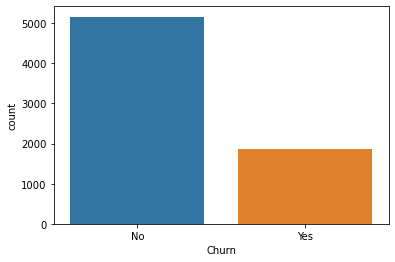

In [7]:
sns.countplot(data=df,x='Churn')

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
for index,column in enumerate(df.columns):
    print('\nFeature {}: {}, unique values: {}'.format(index,column,df[column].unique()))


Feature 0: customerID, unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Feature 1: gender, unique values: ['Female' 'Male']

Feature 2: SeniorCitizen, unique values: [0 1]

Feature 3: Partner, unique values: ['Yes' 'No']

Feature 4: Dependents, unique values: ['No' 'Yes']

Feature 5: tenure, unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Feature 6: PhoneService, unique values: ['No' 'Yes']

Feature 7: MultipleLines, unique values: ['No phone service' 'No' 'Yes']

Feature 8: InternetService, unique values: ['DSL' 'Fiber optic' 'No']

Feature 9: OnlineSecurity, unique values: ['No' 'Yes' 'No internet service']

Feature 10: OnlineBackup, unique values: ['Yes' 'No' 'No internet service']

Feature 11: DeviceProtection, unique values: ['No' 'Yes' 'No int

In [10]:
df = df.drop('customerID',axis=1)

In [11]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [12]:
def trim_auto(x):
    if '(automatic)' in x:
        y = ' '.join(x.split(' ')[:-1])
        return y
    else:
        return x

In [13]:
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x:trim_auto(x))

In [14]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

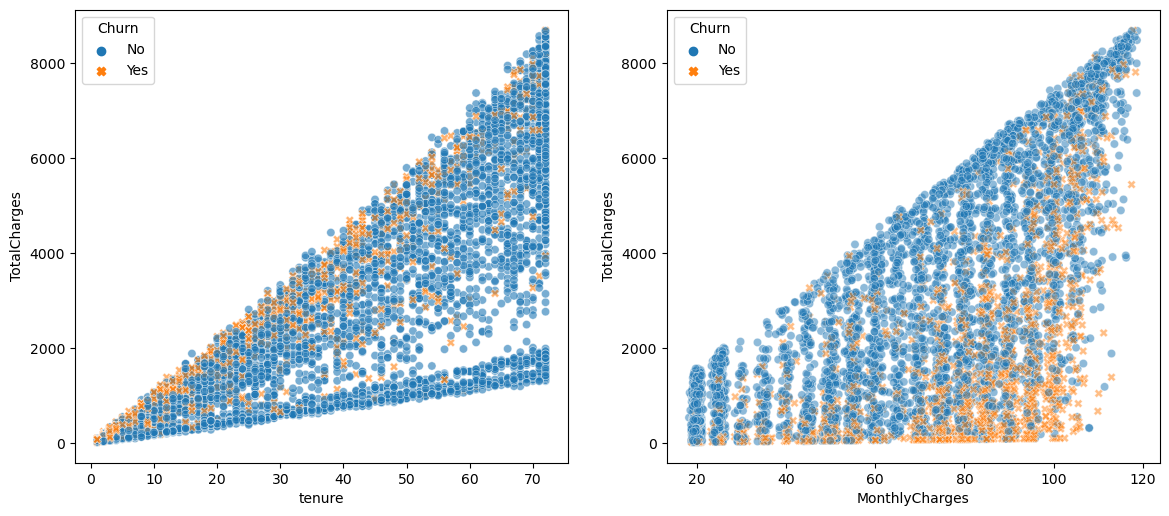

In [16]:
fig,axe = plt.subplots(ncols=2,nrows=1,figsize=(14,6),dpi=100)
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',style='Churn',alpha=0.6,ax=axe[0])
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',style='Churn',alpha=0.5,ax=axe[1])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

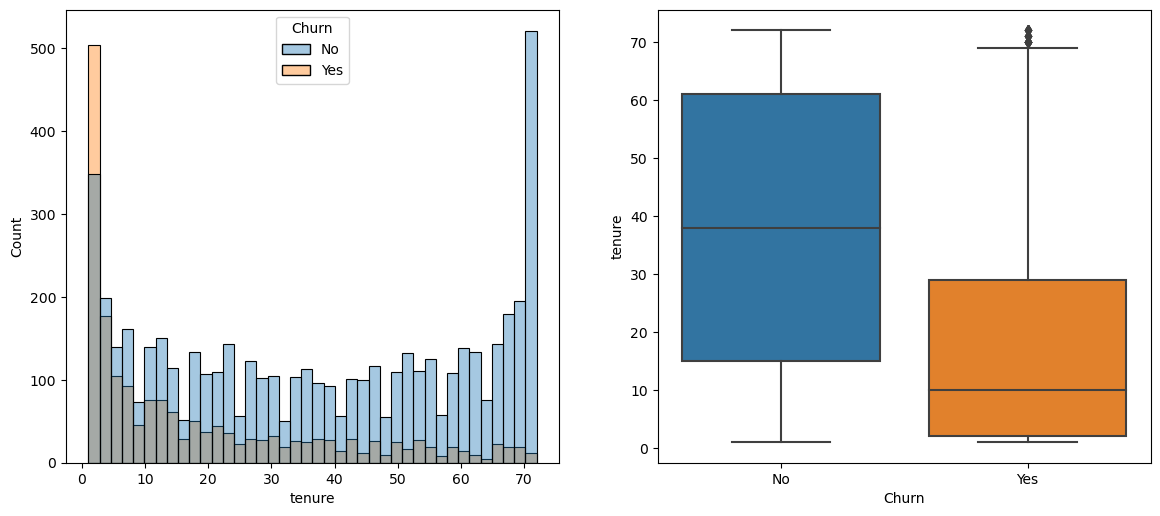

In [17]:
fig,axe = plt.subplots(ncols=2,nrows=1,figsize=(14,6),dpi=100)
sns.histplot(data=df,x='tenure',bins=40,ax=axe[0],hue='Churn',alpha=0.4)
sns.boxplot(data=df,x='Churn',y='tenure',ax=axe[1])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

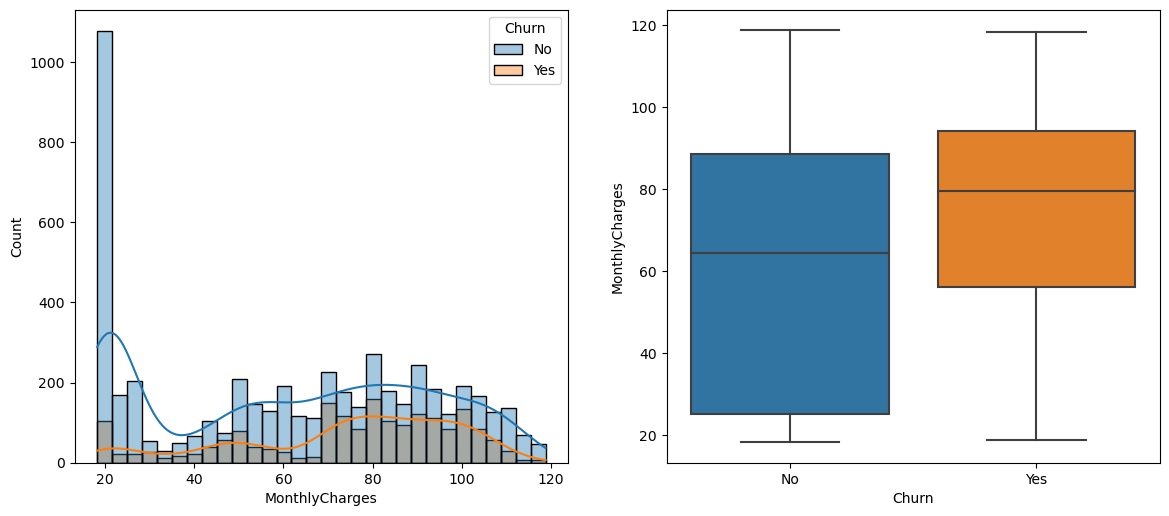

In [18]:
fig,axe = plt.subplots(ncols=2,nrows=1,figsize=(14,6),dpi=100)
sns.histplot(data=df,x='MonthlyCharges',bins=30,ax=axe[0],hue='Churn',alpha=0.4,kde=True)
sns.boxplot(data=df,x='Churn',y='MonthlyCharges',ax=axe[1])

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

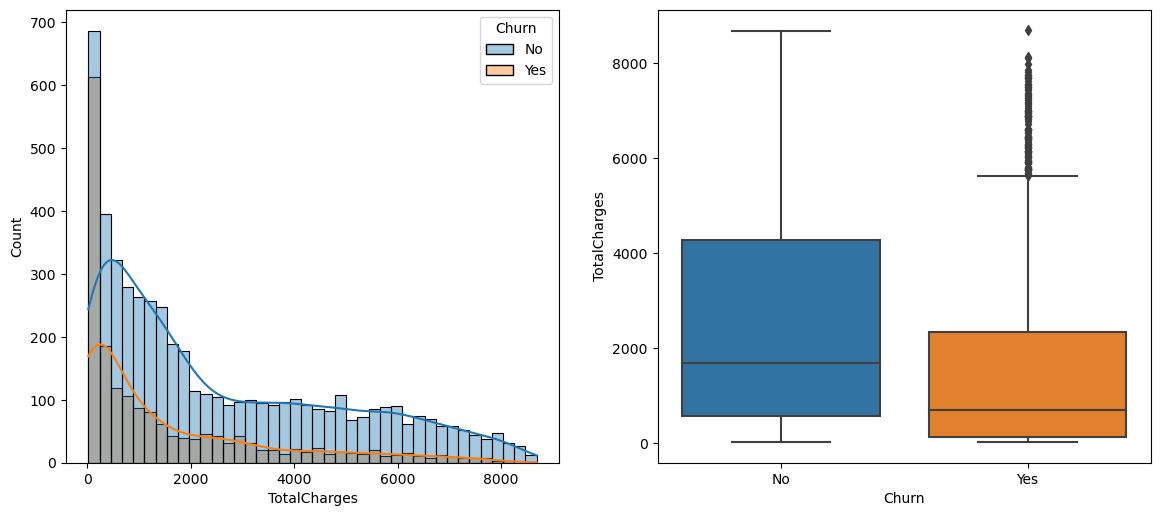

In [19]:
fig,axe = plt.subplots(ncols=2,nrows=1,figsize=(14,6),dpi=100)
sns.histplot(data=df,x='TotalCharges',bins=40,ax=axe[0],hue='Churn',alpha=0.4,kde=True)
sns.boxplot(data=df,x='Churn',y='TotalCharges',ax=axe[1])

<AxesSubplot:xlabel='Partner', ylabel='count'>

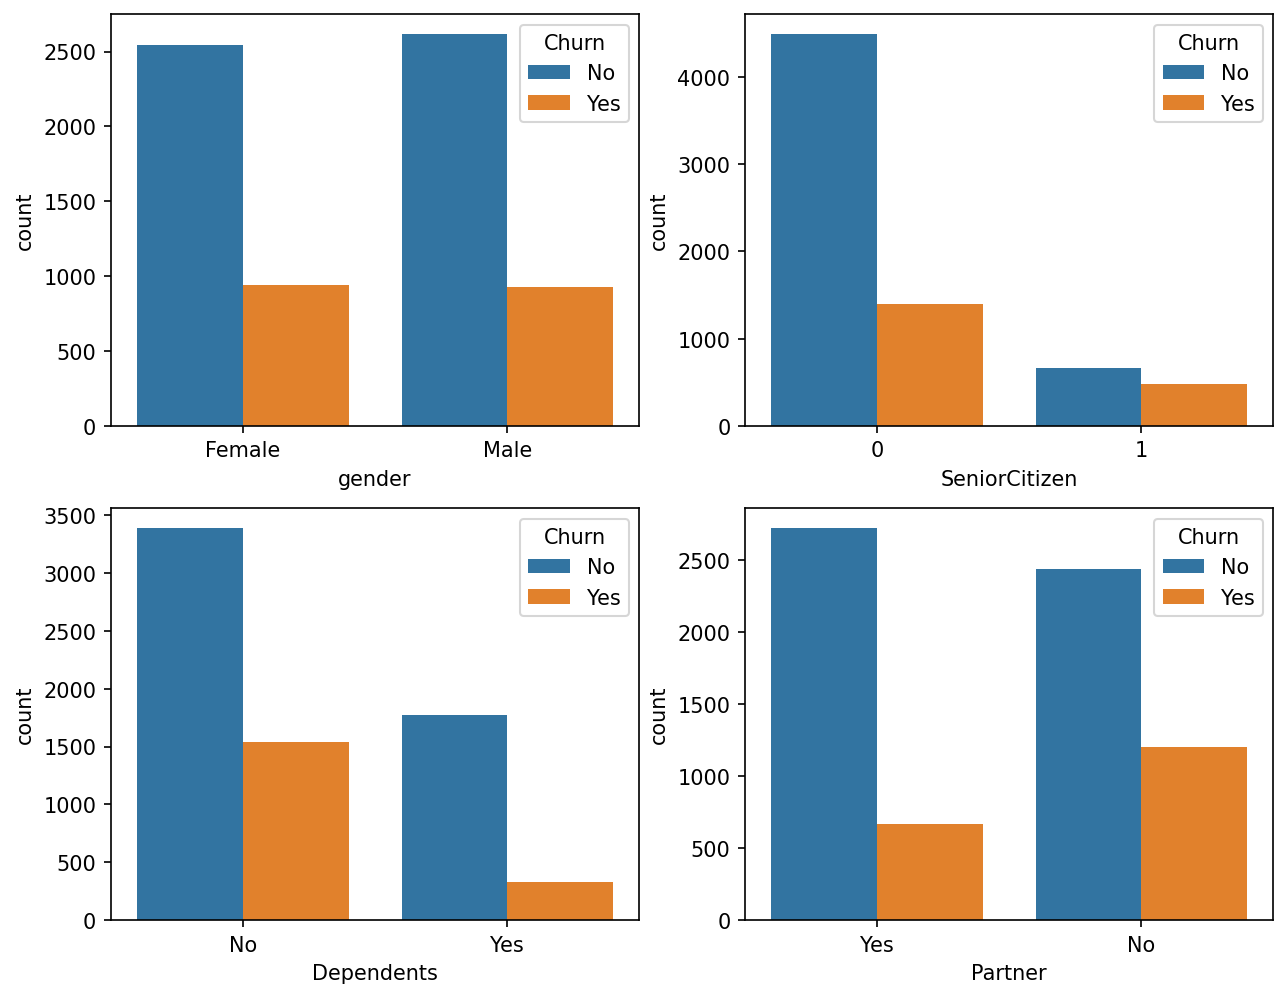

In [20]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8),dpi=150)
ax1,ax2=ax
sns.countplot(data=df,x='gender',hue='Churn',ax=ax1[0])
sns.countplot(data=df,x='SeniorCitizen',hue='Churn',ax=ax1[1])
sns.countplot(data=df,x='Dependents',hue='Churn',ax=ax2[0])
sns.countplot(data=df,x='Partner',hue='Churn',ax=ax2[1])

In [21]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

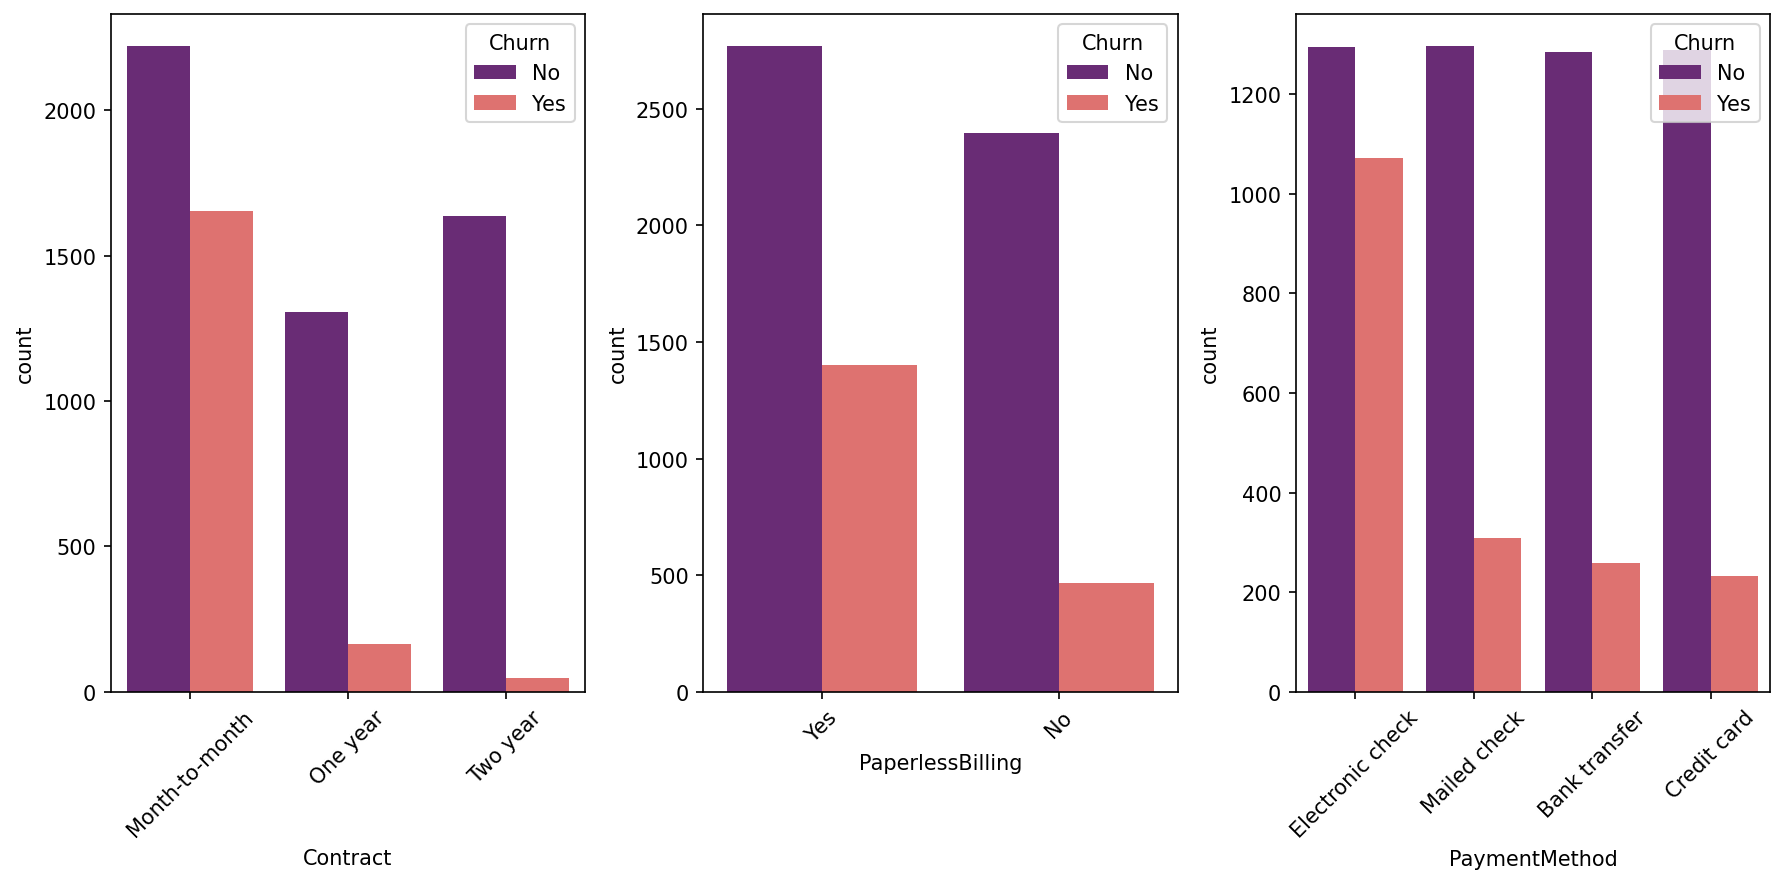

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,6),dpi=150)

sns.countplot(data=df,x='Contract',hue='Churn',ax=ax[0],palette='magma')
ax[0].set_xticklabels(['Month-to-month','One year','Two year'],rotation=45)

sns.countplot(data=df,x='PaperlessBilling',hue='Churn',ax=ax[1],palette='magma')
ax[1].set_xticklabels(['Yes','No'],rotation=45)

sns.countplot(data=df,x='PaymentMethod',hue='Churn',ax=ax[2],palette='magma')
ax[2].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],rotation=45);

plt.tight_layout()

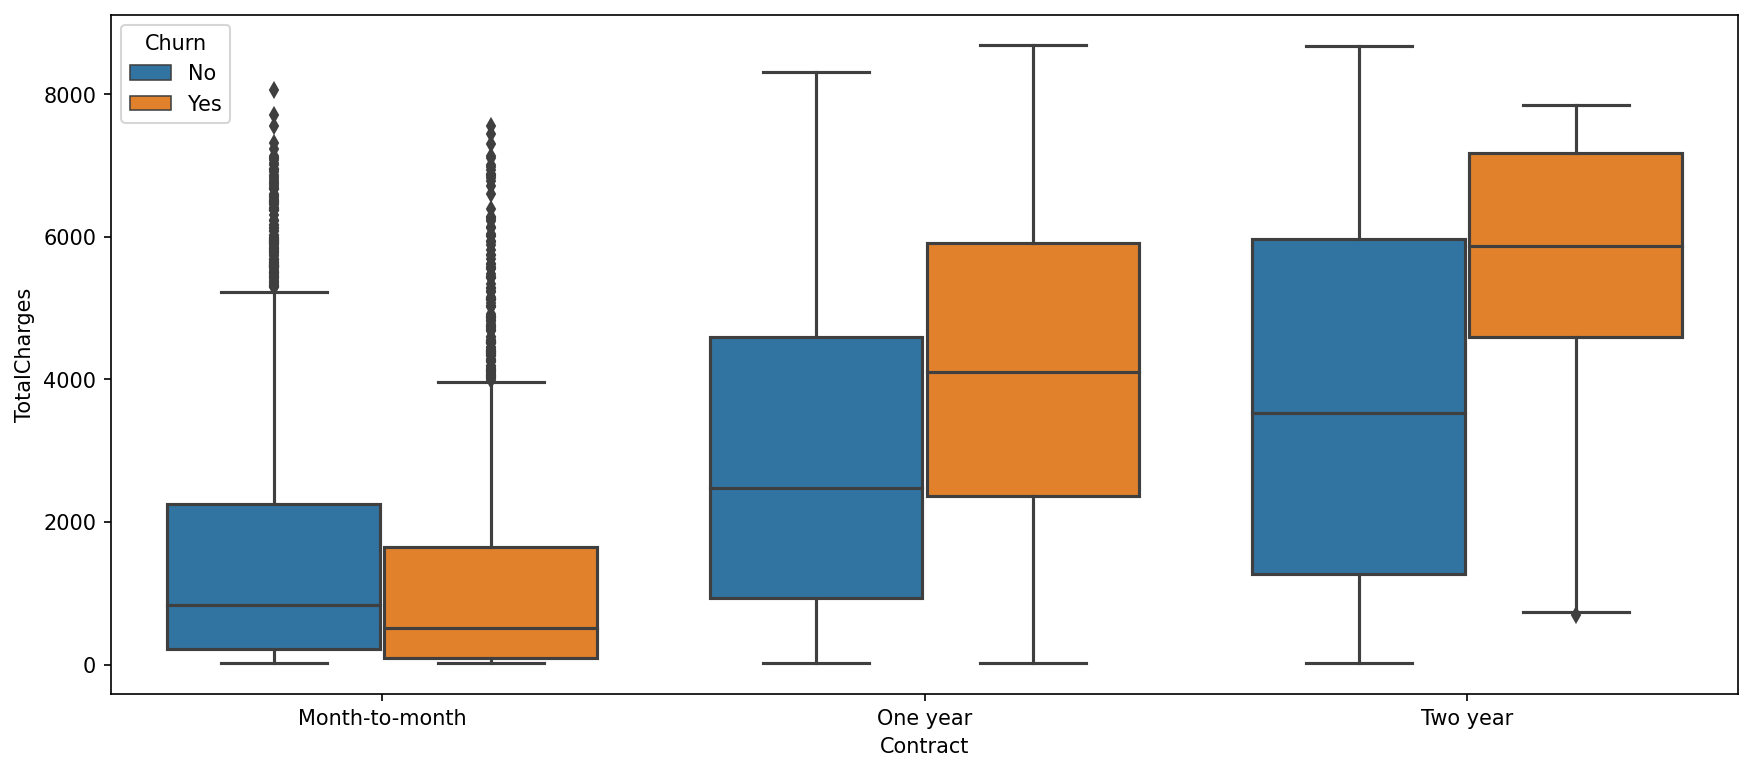

In [290]:
plt.figure(figsize=(14,6),dpi=150)
sns.boxplot(data=df,y='TotalCharges',hue='Churn',x='Contract')
plt.show()

## PREDICTIVE ANALYSIS

Feature selection:

In [25]:
X = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)

In [27]:
y = df['Churn']

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
decision_tree_model = DecisionTreeClassifier(max_depth=4)

In [52]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [53]:
predictions = decision_tree_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

In [55]:
confusion_matrix(y_test,predictions)

array([[1415,  165],
       [ 267,  263]], dtype=int64)

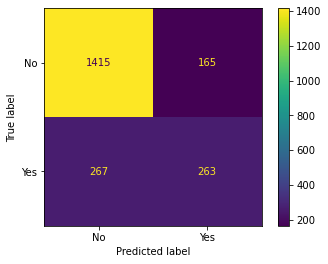

In [56]:
plot_confusion_matrix(decision_tree_model,X_test,y_test)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.61      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



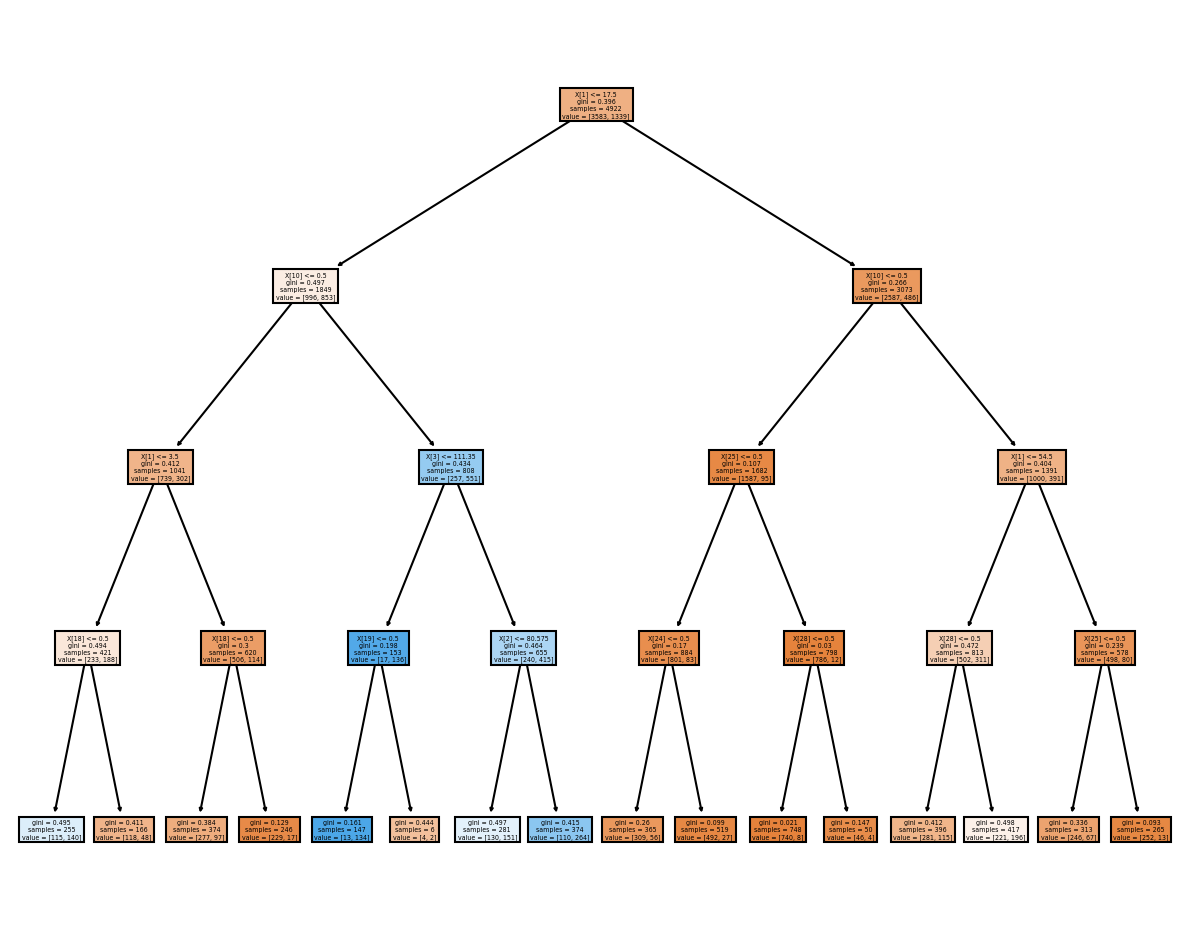

In [58]:
plt.figure(figsize=(10,8),dpi=150)
plot_tree(decision_tree_model,filled=True);

## Random Forest

Random Forest with default parameters:

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
random_forest_model = RandomForestClassifier()

In [209]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [210]:
rf_predictions = random_forest_model.predict(X_test)

In [211]:
confusion_matrix(y_test,rf_predictions)

array([[1426,  154],
       [ 261,  269]], dtype=int64)

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1580
         Yes       0.64      0.51      0.56       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.80      2110



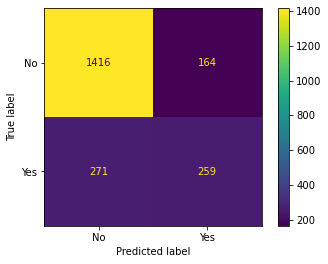

In [212]:
print(classification_report(y_test,rf_predictions))
plot_confusion_matrix(random_forest_model,X_test,y_test)

Random forest with hyperparameter adjusted:

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

In [217]:
rf_param_grid = {
    'n_estimators':[64,100,128,200,256,300],
    'max_depth':[3,4,5,6,7,8]
}

In [218]:
random_forest_grid_model = GridSearchCV(random_forest_model,param_grid=rf_param_grid)

In [219]:
random_forest_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [64, 100, 128, 200, 256, 300]})

In [220]:
random_forest_grid_model.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=256)

In [221]:
imp_features = random_forest_grid_model.best_estimator_.feature_importances_

<AxesSubplot:xlabel='Importance'>

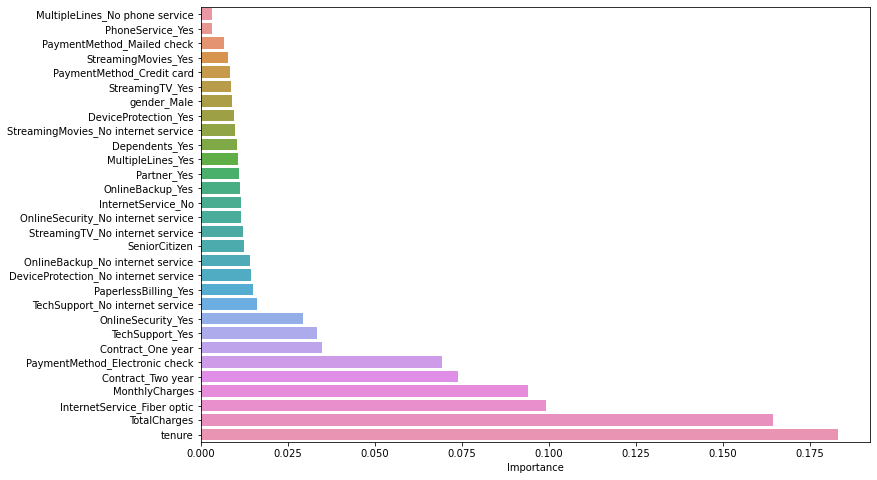

In [222]:
plt.figure(figsize=(12,8))
imp_feat = pd.DataFrame(data=imp_features.reshape([-1,1]),
             index=X.columns,columns=['Importance'])
imp_feat = imp_feat.sort_values('Importance')
sns.barplot(data=imp_feat,y=imp_feat.index,x='Importance')

In [223]:
rf_grid_predictions = random_forest_grid_model.predict(X_test)

In [235]:
confusion_matrix(y_test,rf_grid_predictions)

array([[1442,  138],
       [ 263,  267]], dtype=int64)

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



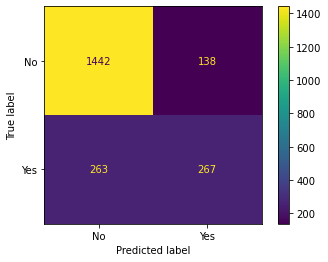

In [236]:
print(classification_report(y_test,rf_grid_predictions))
plot_confusion_matrix(random_forest_grid_model,X_test,y_test)
plt.show()

## Boosting methods

Adaboost classification:

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [237]:
adaboost_model = AdaBoostClassifier()
adb_param_grid = {
    'n_estimators':[20,35,50,100,120,150,200]
}

In [238]:
adaboost_grid_model = GridSearchCV(adaboost_model,param_grid=adb_param_grid)

In [239]:
adaboost_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [20, 35, 50, 100, 120, 150, 200]})

In [240]:
adaboost_grid_model.best_estimator_

AdaBoostClassifier(n_estimators=35)

<AxesSubplot:xlabel='Importance'>

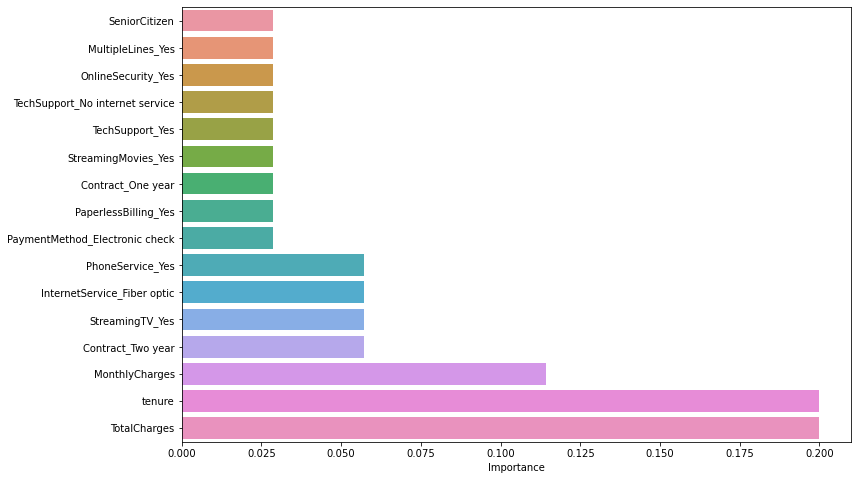

In [241]:
imp_features = adaboost_grid_model.best_estimator_.feature_importances_
plt.figure(figsize=(12,8))
imp_feat = pd.DataFrame(data=imp_features.reshape([-1,1]),
             index=X.columns,columns=['Importance'])
imp_feat = imp_feat[imp_feat['Importance'] > 0]
imp_feat = imp_feat.sort_values('Importance')
sns.barplot(data=imp_feat,y=imp_feat.index,x='Importance')

In [242]:
adb_grid_predictions = adaboost_grid_model.predict(X_test)

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1580
         Yes       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



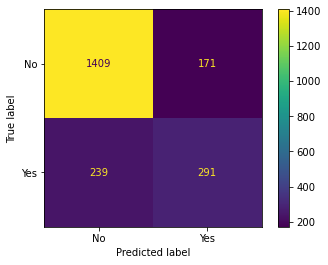

In [243]:
print(classification_report(y_test,adb_grid_predictions))
plot_confusion_matrix(adaboost_grid_model,X_test,y_test)
plt.show()

Gradient Boost Classification:

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [245]:
gradient_boost_model = GradientBoostingClassifier()

In [248]:
gdb_param_grid = {
    'learning_rate':[0.1,0.01],
    'n_estimators':[50,100],
    'max_depth':[4,5,6]
}

In [249]:
gradient_boost_grid_model = GridSearchCV(gradient_boost_model,param_grid=gdb_param_grid)

In [250]:
gradient_boost_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [4, 5, 6],
                         'n_estimators': [50, 100]})

In [251]:
gradient_boost_grid_model.best_estimator_

GradientBoostingClassifier(max_depth=4)

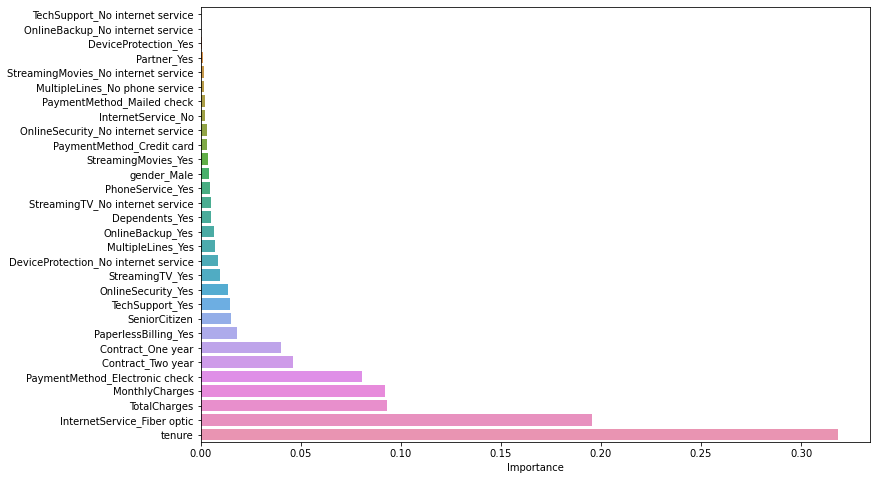

In [252]:
imp_features = gradient_boost_grid_model.best_estimator_.feature_importances_
plt.figure(figsize=(12,8))
imp_feat = pd.DataFrame(data=imp_features.reshape([-1,1]),
             index=X.columns,columns=['Importance'])
imp_feat = imp_feat[imp_feat['Importance'] > 0]
imp_feat = imp_feat.sort_values('Importance')
sns.barplot(data=imp_feat,y=imp_feat.index,x='Importance')
plt.show()

In [255]:
gdb_grid_predictions = gradient_boost_grid_model.predict(X_test)

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1580
         Yes       0.63      0.51      0.56       530

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.80      2110



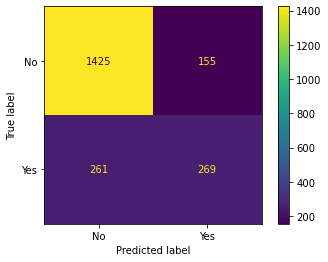

In [256]:
print(classification_report(y_test,gdb_grid_predictions))
plot_confusion_matrix(gradient_boost_grid_model,X_test,y_test)
plt.show()

Normalizing Numeric features:

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
min_max = MinMaxScaler()

In [259]:
mmx_x_train = min_max.fit_transform(X_train)

In [260]:
mmx_x_test = min_max.transform(X_test)

## Logistic Regression:

In [262]:
from sklearn.linear_model import LogisticRegressionCV

In [265]:
logistic_model = LogisticRegressionCV(Cs=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.5,0.9,1],solver='saga',cv=5)

In [266]:
logistic_model.fit(mmx_x_train,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.9,
                         1],
                     cv=5, solver='saga')

In [267]:
logistic_model.C_

array([0.3])

In [270]:
log_predictions = logistic_model.predict(mmx_x_test)

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1580
         Yes       0.64      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



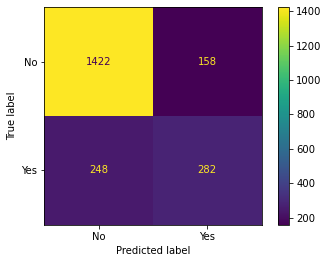

In [271]:
print(classification_report(y_test,log_predictions))
plot_confusion_matrix(logistic_model,mmx_x_test,y_test)
plt.show()

## Support vector machine

In [272]:
from sklearn.svm import SVC

In [273]:
support_vec_classifier = SVC()

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
svc_param_grid = {
    'C':[0.001,0.01,0.1,1,2,5,7,10,50,100,150,200]
}

In [276]:
svc_grid_model = GridSearchCV(support_vec_classifier,param_grid=svc_param_grid)

In [277]:
svc_grid_model.fit(mmx_x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 7, 10, 50, 100, 150,
                               200]})

In [278]:
svc_grid_model.best_estimator_

SVC(C=2)

In [279]:
svc_grid_predictions = svc_grid_model.predict(mmx_x_test)

              precision    recall  f1-score   support

          No       0.85      0.91      0.87      1580
         Yes       0.64      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.81      0.80      2110



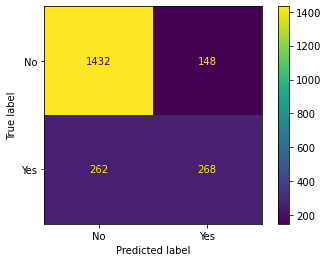

In [280]:
print(classification_report(y_test,svc_grid_predictions))
plot_confusion_matrix(svc_grid_model,mmx_x_test,y_test)
plt.show()